In [81]:
from calculations import *
import matplotlib.pyplot as plt
from ipywidgets import interactive,interact,IntSlider
plt.rcParams['figure.figsize'] = [8, 8]
plt.ion()
%matplotlib notebook

In [82]:
def plot_n_potential(density,radius,repeats=1,upper_limit=2000):
    diffs = []
    theorys = []
    programs = []
    xs = []
    n = upper_limit
    start = 10
    for i in range(start,n,10):
        xs.append(i)
        theorys.append(get_phi(n_particles=i,density=density,radius=radius))
        diff = 0
        programmatics = 0
        for j in range(repeats):
            temp,theory,programmatic = get_diff(n_particles=i,density=density,radius=radius)
            programmatics += programmatic
            diff += temp
        programmatics = programmatics/repeats
        programs.append(programmatics)
        diff = abs(diff/repeats)
        diffs.append(diff)
        
    fig, (overlay_plot,diff_plot) = plt.subplots(2,1)

    overlay_plot.plot(xs,programs,alpha=0.4, label = "Calculated")
    overlay_plot.plot(xs,theorys,alpha=0.4, label = "Theoretical")
    overlay_plot.set_xlabel('N Particles')
    overlay_plot.set_ylabel('Potential')
    overlay_plot.legend(loc ="upper right")
    overlay_plot.set_title('Theoretical/Calculated Overlay',pad=12)

    diff_plot.plot(xs,diffs)
    diff_plot.set_xlabel('N Particles')
    diff_plot.set_ylabel('Delta Potential')
    diff_plot.set_title('Theoretical/Calculated Difference',pad=12)

    fig.suptitle('Variable N, Density = ' + str(density) + ', Radius = ' + str(radius) + ', Repeats = ' + str(repeats), fontsize=16)
    fig.tight_layout()
    plt.show()


In [83]:

def get_spread(n_particles,density,radius,repeats):
    theory = get_phi(density=density,radius=radius)
    data = []
    for i in range(repeats):
        temp,theory,programmatic = get_diff(n_particles=n_particles,density=density,radius=radius)
        data.append(programmatic)
    
    plt.ioff()
    
    fig, (scatter_plot,box_plot) = plt.subplots(1,2)

    scatter_plot.scatter([1]*len(data),data,s=5, label = "Calculated")
    scatter_plot.scatter([1],[theory],s=5, label = "Theoretical")
    scatter_plot.legend(loc ="upper right",prop={'size': 6})
    scatter_plot.set_ylabel('Potential')
    scatter_plot.get_xaxis().set_visible(False)
    scatter_plot.set_title('Theoretical/Calculated Constant N',pad=12)

    box_plot.set_title('Calculated Box Plot',pad=12)
    box_plot.boxplot(data)
    box_plot.set_ylabel('Potential')
    box_plot.get_xaxis().set_visible(False)

    fig.suptitle('N = ' + str(n_particles) + ', Density = ' + str(density) + ', Radius = ' + str(radius) + ', Repeats = ' + str(repeats), fontsize=16)
    fig.tight_layout()
    plt.show()


In [84]:

def plot_r_potential(n_particles,density,repeats,radiuses):
    theorys = [get_phi(density=density,radius=radius) for radius in radiuses]
    theory_xs = radiuses
    data = []
    xs = []

    for n in n_particles:
        #temp_theory = []
        #temp_theory_xs = []
        temp_data = []
        temp_xs = []
        for radius in radiuses:
            #this_theory = get_phi(density=density,radius=radius)
            #print(this_theory)
            #temp_theory.append(this_theory)
            #temp_theory_xs.append(radius)
            for i in range(repeats):
                temp,theory,programmatic = get_diff(n_particles=n,density=density,radius=radius)
                temp_data.append(programmatic)
                temp_xs.append(radius)
        #theorys.append(temp_theory.copy())
        #theory_xs.append(temp_theory_xs)
        data.append(temp_data.copy())
        xs.append(temp_xs)

    radiuses = np.array(radiuses)
    theorys = np.array(theorys)
    theory_xs = np.array(theory_xs)
    data = np.array(data)
    xs = np.array(xs)
    
    fig, ax = plt.subplots()
    #fig.suptitle('Vary Radius, N = ' + str()', Density = ' + str(density) + ', Repeats = ' + str(repeats), fontsize=16)
    data_plot = plt.scatter(xs[0], data[0])
    plt.plot(theory_xs,theorys)
    ax.set_ylabel('Potential')
    ax.set_xlabel('Radius')
    plt.subplots_adjust(left=0.1,bottom=0.25)
    #ax.set_xlabel('Time [s]')

    #axslid = plt.axes([0.2, 0.1, 0.7, 0.03])
    #n_slider = Slider(ax=axslid, label='N Particles', valmin=0, valmax=len(n_particles)-1,valinit=0,valstep=1,orientation="horizontal",valfmt='%0.1f')
    #axslid.add_artist(axslid.xaxis)
    #xticks = [str(l) for l in n_particles]
    #axslid.set_xticks([l for l in range(len(n_particles))])
    #axslid.set_xticklabels(xticks)
    
    def update(n_slider=0):
        fig.suptitle('Vary Radius, N = ' + str(n_particles[n_slider]) + ', Density = ' + str(density) + ', Repeats = ' + str(repeats), fontsize=16)
        temp = np.hstack([xs[n_slider][:,np.newaxis],data[n_slider][:,np.newaxis]])
        data_plot.set_offsets(temp)
        #fig.canvas.draw()
        plt.show()
        
    interact(update, n_slider=IntSlider(min=0,max=len(n_particles)-1))

<IPython.core.display.Javascript object>


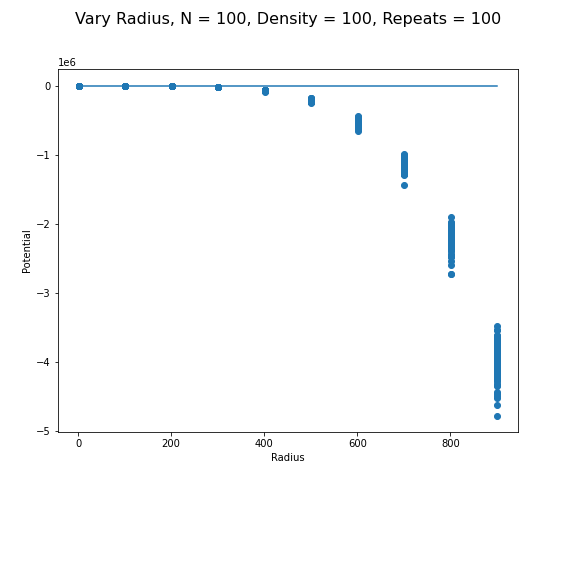

interactive(children=(IntSlider(value=0, description='n_slider', max=11), Output()), _dom_classes=('widget-int…

In [85]:
plot_r_potential(list(range(100,3000,250)),100,100,list(range(1,1000,100)))

<IPython.core.display.Javascript object>


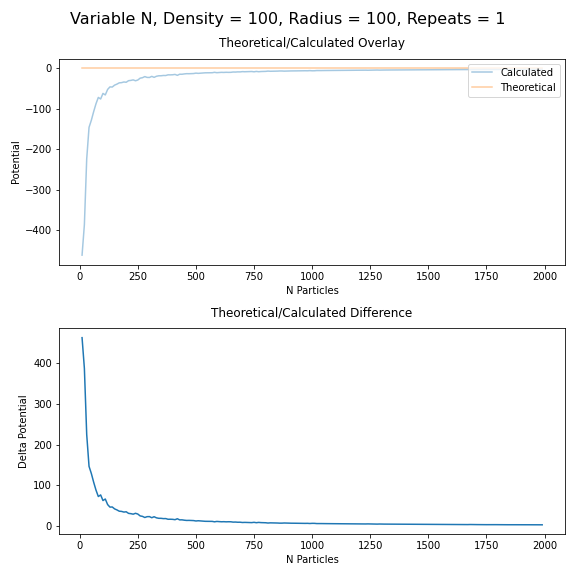

In [72]:

plot_n_potential(100,100)


<IPython.core.display.Javascript object>


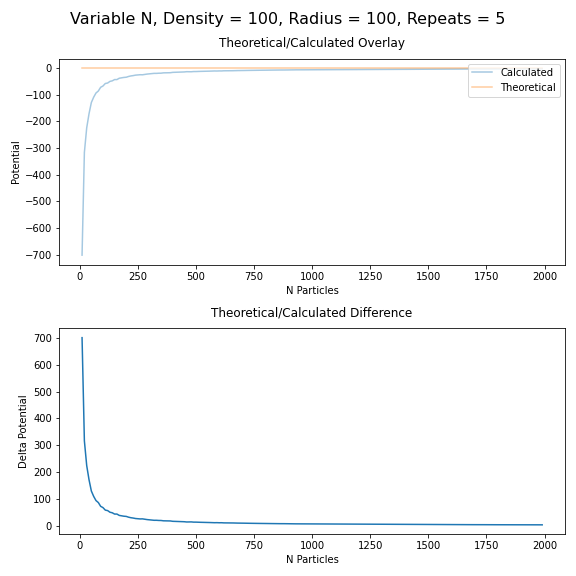

In [73]:

plot_n_potential(100,100,5)


<IPython.core.display.Javascript object>


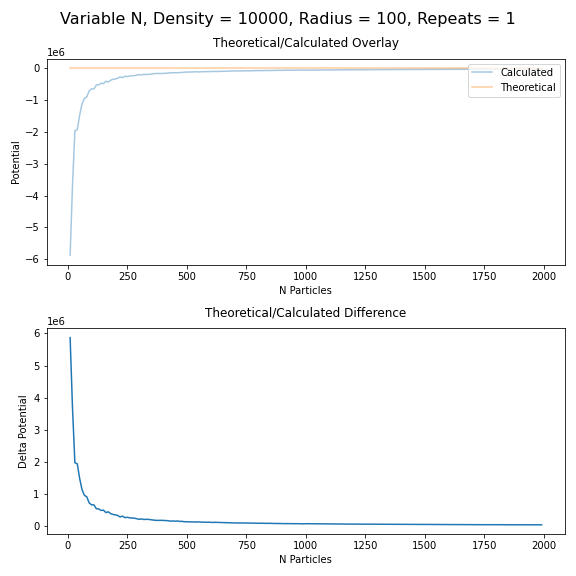

In [74]:

plot_n_potential(10000,100)



<IPython.core.display.Javascript object>


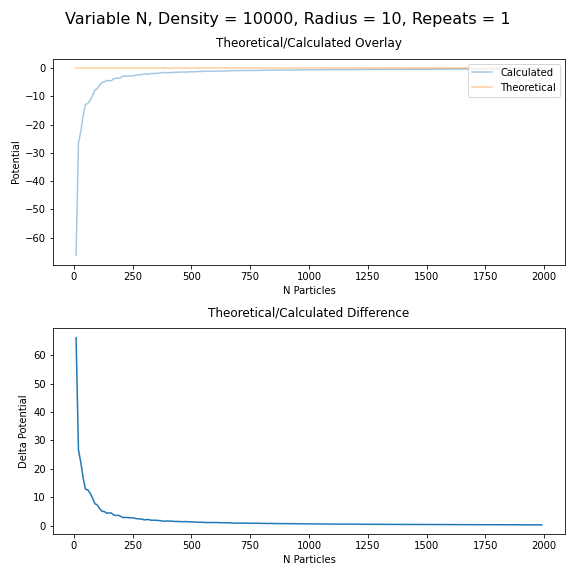

In [75]:

plot_n_potential(10000,10)


<IPython.core.display.Javascript object>


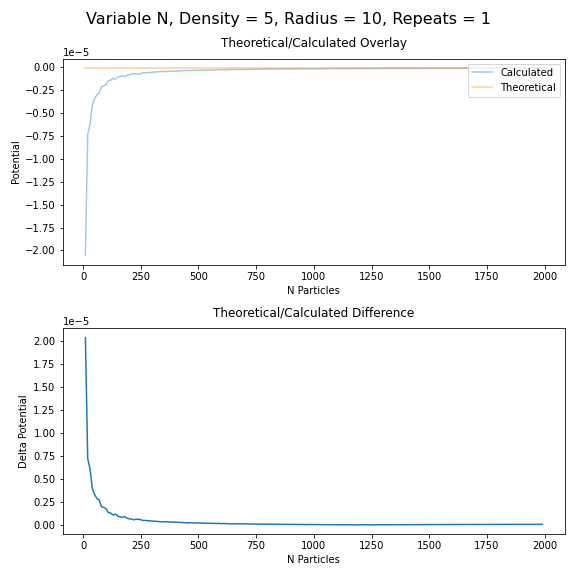

In [76]:

plot_n_potential(5,10)


<IPython.core.display.Javascript object>


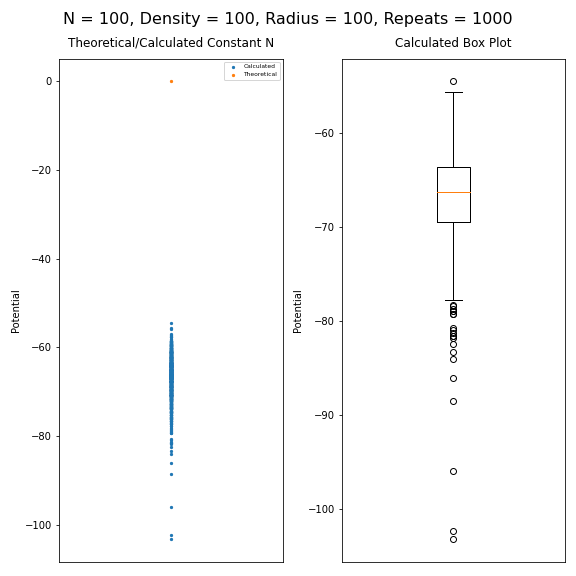

In [77]:
get_spread(100,100,100,1000)


<IPython.core.display.Javascript object>


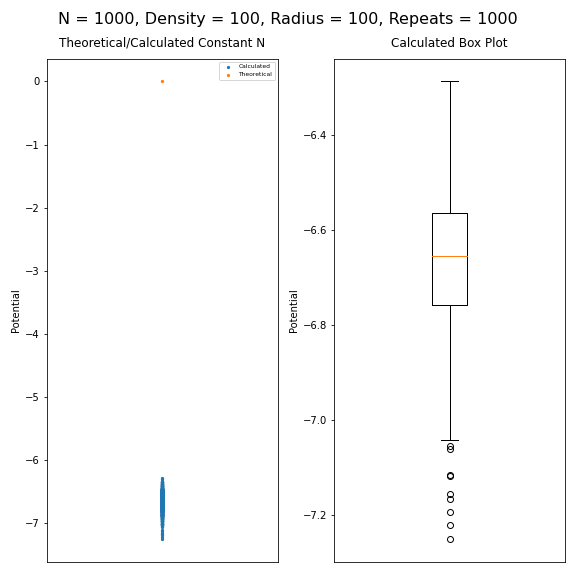

In [78]:
get_spread(1000,100,100,1000)


<IPython.core.display.Javascript object>


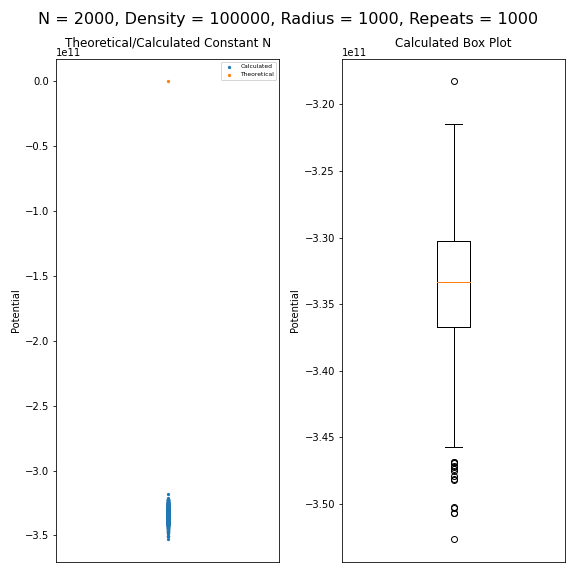

In [79]:
get_spread(2000,100000,1000,1000)


<IPython.core.display.Javascript object>


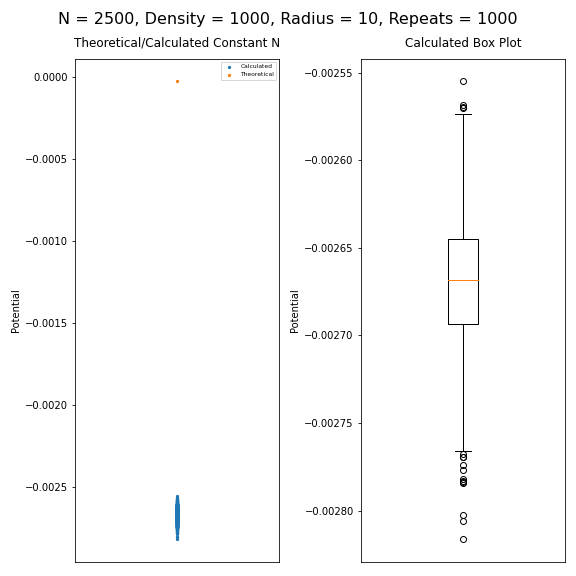

In [80]:
get_spread(2500,1000,10,1000)